# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* *Ann-Kristin Bergmann*
* *Nephele Aesopou*
* *Ewa Miazga*
* *Tan Mai Vu*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [6]:
# Import useful packages
import requests
import random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Base url of the API
URL_TEMPLATE = 'http://iccluster050.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
# Target user id
user_id = 'a5771bce93e200c36f7cd9dfd0e5deaa'
# The actual url to call 
url = URL_TEMPLATE.format(user_id=user_id)
# Execute the HTTP Get request
response = requests.get(url)
# Format the json response as a Python dict
data = response.json()
print(data)

{'age': 13, 'friends': ['0065470d21f5f095cc304a048984387a', '634f079997d1329f9504e68870b33a9f', '6005f35032ccbc32c007209c9547a709', '08f3a0aaa93613f038951a575d280c7f', 'c55d0ff1eae9cddaf7210e9c71723525', '6a69bc21b975da2f1cdbbae760b39c07', 'a71e2294bc054a5da616e95b62e56b7e', '38b924a395511befa9220c1e8d1ef5c0', '4d99132299edfc28685448a96897747a', '1a89c02b4ff39b25f2f39fdfb6cbdbd2', 'd626f6fef9b29cb8dfad7d934a3cc54d', '34e697ef81b7b1bd545f98db5838e381', 'f0bdd1272e789cbda23d05793eaa6a34', 'f5729dfe71e7fba947dda59e5dcda6ec', '65577359f97d8439213634b003f3b861', '203dad9f8a7f800dc989c4c7b8de99b3', 'ddce98067818fc80b34d75d33c03ad5e', '0febaab403c822fb433e0a2342cdc4af', '872c6bf367b74a78571bd45fda388e64', '003efe2da6eec0b3be2633b06332e449', '87fbfee43e31e758b6bc53765e51357a', 'e4210f5867c8f1365b0cfbb59033c099', 'c5c3abb93877757fe8be1853faadb5ab', '3d56b1a1925d4b54ec6a196b81a0f7f4', '0b3be23e4183de00ae3ce94938f254a3', '5de130190b5765ec1df570346a7ddb44', '4f2b867da90cfc884b7c0cd516663dfa', '442

In [8]:
# Random Walk algorithm. N defines the number of users we want to visit.
def RW(source_node, N):
    # use the same seed
    random.seed(0)
    
    current_node = source_node
    i = 0
    ages = []
    while (i<N):
        # The actual url to call 
        url = URL_TEMPLATE.format(user_id=current_node)
        # Execute the HTTP Get request
        response = requests.get(url)
        # Format the json response as a Python dict
        data = response.json()
        # Get age of current node and append it to the list of ages
        current_age = data['age']
        ages.append(current_age)
        # Choose at random a friend of the current node
        current_node = random.choice(data['friends'])
        i += 1
        
    average_age = np.mean(ages)
    print('Average age', average_age)
    return average_age, ages

In [22]:
# Check convergence of algorithm and print the average Facebook user age.
def find_average_age(algorithm, source_node, N, epsilon, max_iters):
    temp_node = algorithm(source_node,1)[0]
    n = 0 # initialize iteration counter

    while (n < max_iters):
        current_node = algorithm('a5771bce93e200c36f7cd9dfd0e5deaa', N)[0]
        if (abs(temp_node - current_node) > epsilon):
            temp_node = current_node
            n +=1
            N += 50 # we choose to increase the number of random walks by 50 each time
        else:
            print("The algorithm converged and the mean user age is", np.around(current_node))
            print("Number of users visited is", N)
            break 

In [23]:
find_average_age(RW, user_id, 100, 0.4, 200) # N = 350

Average age 13.0
Average age 24.87
Average age 23.8
Average age 23.11
Average age 22.344
Average age 21.57
Average age 21.614285714285714
The algorithm converged and the mean user age is 22.0
Number of users visited is 350


**What is your estimation of the average age of a Facebook user?  How many users did you visit to get this estimation?**

Our estimation of the average age of a Facebook user is 22 years old. We have to visit about 350 users to get this estimation (N depends on the initial value we give it and how precise we want to be when converging - epsilon).

Average age 24.87
Average age 23.8
Average age 23.11
Average age 22.344
Average age 21.57
Average age 21.614285714285714
Average age 22.0375
Average age 21.675555555555555
Average age 21.9
Average age 21.78181818181818


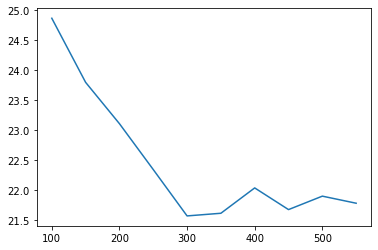

In [11]:
# Plot graph to investigate convergence
N = np.arange(100,600,50)
walks = [RW('a5771bce93e200c36f7cd9dfd0e5deaa', n)[0] for n in N]
plt.plot(N, walks)

#### Exercise 2.8

1. Our average of 22 years old is not as close as we would like to 45 years old. 
2. In order to explain the discrepancy we have to investigate further:

In [12]:
# Check frequency of ages in RW
# Same algorithm as RW but calculates the frequency of each unique age value and plots it as a bar graph.
def RW_freq(source_node, N):
    ages = RW(source_node=source_node, N=N)[1]

    ages, counts = np.unique(ages, return_counts=True)
    plt.bar(ages, counts)

Average age 21.9


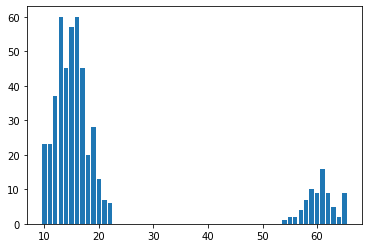

In [13]:
RW_freq(user_id, 500)

In [14]:
# Plot a graph to investigate the relationship between node degree and frequency

def RW_degrees(source_node, N):
    random.seed(0)
    current_node = source_node
    i = 0
    degrees = []
    while (i<N):
        # The actual url to call 
        url = URL_TEMPLATE.format(user_id=current_node)
        # Execute the HTTP Get request
        response = requests.get(url)
        # Format the json response as a Python dict
        data = response.json()
        current_node_degree = len(data['friends'])

        # To investigate the age of the degrees that have many friends in Facebook:
        if current_node_degree > 300:
            print('Current user has', current_node_degree, 'friends and his age is', data['age'])
        degrees.append(current_node_degree)
        current_node = random.choice(data['friends'])
        i += 1

    degree, counts = np.unique(degrees, return_counts=True)
    plt.plot(degree, counts)

Current user has 341 friends and his age is 13
Current user has 768 friends and his age is 12
Current user has 820 friends and his age is 19
Current user has 370 friends and his age is 16
Current user has 949 friends and his age is 15
Current user has 550 friends and his age is 18
Current user has 550 friends and his age is 18
Current user has 325 friends and his age is 16


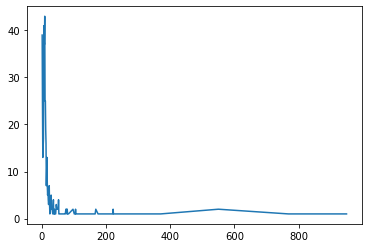

In [16]:
RW_degrees(user_id, 500)

2. **How would you explain the discrepancy?**

Plotting the frequency of ages that we reach from the starting node (1st plot), we can clearly see that there is a big gap in ages from about 30 to 50. Thus, with the current RW algorithm I would require more older ages reached if I require for an average age of 45.

It is also evident that more nodes/facebook users reached by the RW are of the age around 20, that's why the frequency is much higher there. Thus the discrepancy might be because the high degree nodes are sampled more frequently. By the third plot, we can see the users that have above 300 friends on Facebook are less than 20 years old! Hence, the probability of visiting the same "young" nodes is much greater, and thus this theory is very probable. 

3. **Implement a modification to the RW algorithm**

For the new RW algorithm we changed the way we calculate the average age. We want to deal with the fact that nodes with a high degree are sampled more frequently. Hence, we "normalize" the ages of the nodes by dividing the age of the user by his number of friends (degree).

In [28]:
# Random Walk algorithm. N defines the number of users we want to visit.
def RW_updated(source_node, N):
    # use the same seed
    random.seed(0)
    
    current_node = source_node
    i = 0
    ages = []
    degrees = []
    while (i<N):
        # The actual url to call 
        url = URL_TEMPLATE.format(user_id=current_node)
        # Execute the HTTP Get request
        response = requests.get(url)
        # Format the json response as a Python dict
        data = response.json()
        # Get age of current node and append it to the list of ages

        current_age = data['age']
        ages.append(current_age)

        current_degree = len(data['friends'])
        degrees.append(current_degree)

        # Choose at random a friend of the current node
        current_node = random.choice(data['friends'])
        i += 1

    normalized = np.divide(ages, degrees)

    average = sum(normalized) / sum(np.divide(np.ones_like(degrees), degrees))
    print('Updated average age', average)
    return average, ages


In [30]:
find_average_age(RW_updated, user_id, 50, 0.4, 200) # N = 350

Updated average age 13.0
Updated average age 52.81795543748625
Updated average age 45.95640093752468
Updated average age 45.3010947910664
Updated average age 44.265519513219246
Updated average age 42.80739807904791
Updated average age 41.762214723126675
Updated average age 41.76528478734188
The algorithm converged and the mean user age is 42.0
Number of users visited is 350


This way, our new estimation is very close to the one proposed by the study.